In [ ]:
Perform Chi-Square test for Bank Churn predection (find out different patterns on customer leaves the bank). Here i am 
considering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


C:\Users\anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [4]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
le = LabelEncoder()

In [7]:
le.fit_transform(["paris","paris","tokeyo","amsterdam","bangalore","amsterdam"])

array([2, 2, 3, 0, 1, 0], dtype=int64)

In [8]:
le.inverse_transform([1,2,0,1,1])

array(['bangalore', 'paris', 'amsterdam', 'bangalore', 'bangalore'],
      dtype='<U9')

In [9]:
le_gender = LabelEncoder()

In [10]:
le_gender.fit_transform(["male","female","male","male"])

array([1, 0, 1, 1], dtype=int64)

In [11]:
le_gender.fit(["male","female"])

LabelEncoder()

In [12]:
churn_df.Surname.value_counts()

Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Diehl         1 
Simpkinson    1 
Hallahan      1 
Bovee         1 
Morphett      1 
Name: Surname, Length: 2932, dtype: int64

In [28]:
label_encoder = LabelEncoder()
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])
churn_df['Surname'] = label_encoder.fit_transform(churn_df['Surname'])

In [29]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [30]:
churn_df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [31]:
from sklearn.feature_selection import chi2

In [32]:
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']

In [33]:
categorical_columns = ["Surname" , "Geography", "Gender", "Tenure" , "NumOfProdcuts", "HasCrCard", "IsActiveMember"]

In [34]:
chi_scores = chi2(X,y)

In [35]:
chi_scores

(array([4.57638152e+03, 1.28730837e+02, 5.56133225e+02, 1.05403468e+02,
        1.18532506e+01, 5.15399263e+01, 2.30041748e+03, 3.27053797e+00,
        7.15130278e+06, 5.05539429e+00, 1.50040970e-01, 1.18199414e+02,
        4.83508818e+04]),
 array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
        5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
        0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
        0.00000000e+000]))

In [36]:
X.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [38]:
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending = False, inplace= True)

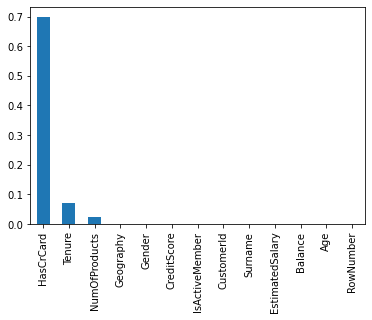

In [39]:
p_values.plot.bar()

In [ ]:
#Since HasCRCard has higer the p value =.068 (greater than std p-Value =0.05), it says that this variable is independent
# of the response --> Exited and can not be cosidered for model training

In [40]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(11)
memory usage: 1.0 MB
